In [69]:
import numpy as np
import pandas as pd
import pickle 
import plotly.express as px

from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

import warnings
warnings.filterwarnings('ignore')

# 1. Import et traitement du main_df principal

In [70]:
with open('Data/part1.pkl', 'rb') as f:
    my_unpickler = pickle.Unpickler(f)
    main_df = my_unpickler.load()

main_df = (
            main_df
                .copy()
    
                # Set country column as index
                .set_index('Country')
    
                # Mean imputation
                .fillna(main_df.mean())
)
    
main_df.head(10)

,pop_evol (%),PIB 2013,kcal_total_capita_day,proteins_total_capita_day,proteins_animal_ratio
Country,,,,,
Arménie,-1.943347,3838.180041,2924.0,90.06,0.480235
Afghanistan,32.168195,608.058642,2087.0,58.26,0.209749
Albanie,-2.037666,4399.863881,3188.0,111.37,0.533537
Algérie,18.801321,5499.587619,3293.0,91.92,0.271867
Angola,39.238700,5254.883253,2474.0,57.27,0.321285
Antigua-et-Barbuda,11.111111,12909.744178,2416.0,83.49,0.680680
Argentine,9.154596,14534.922536,3226.0,102.60,0.652437
Australie,16.989926,66360.873829,3278.0,106.26,0.674572
Autriche,4.335544,50264.050148,3770.0,106.20,0.591902


# 2. Dendrogramme

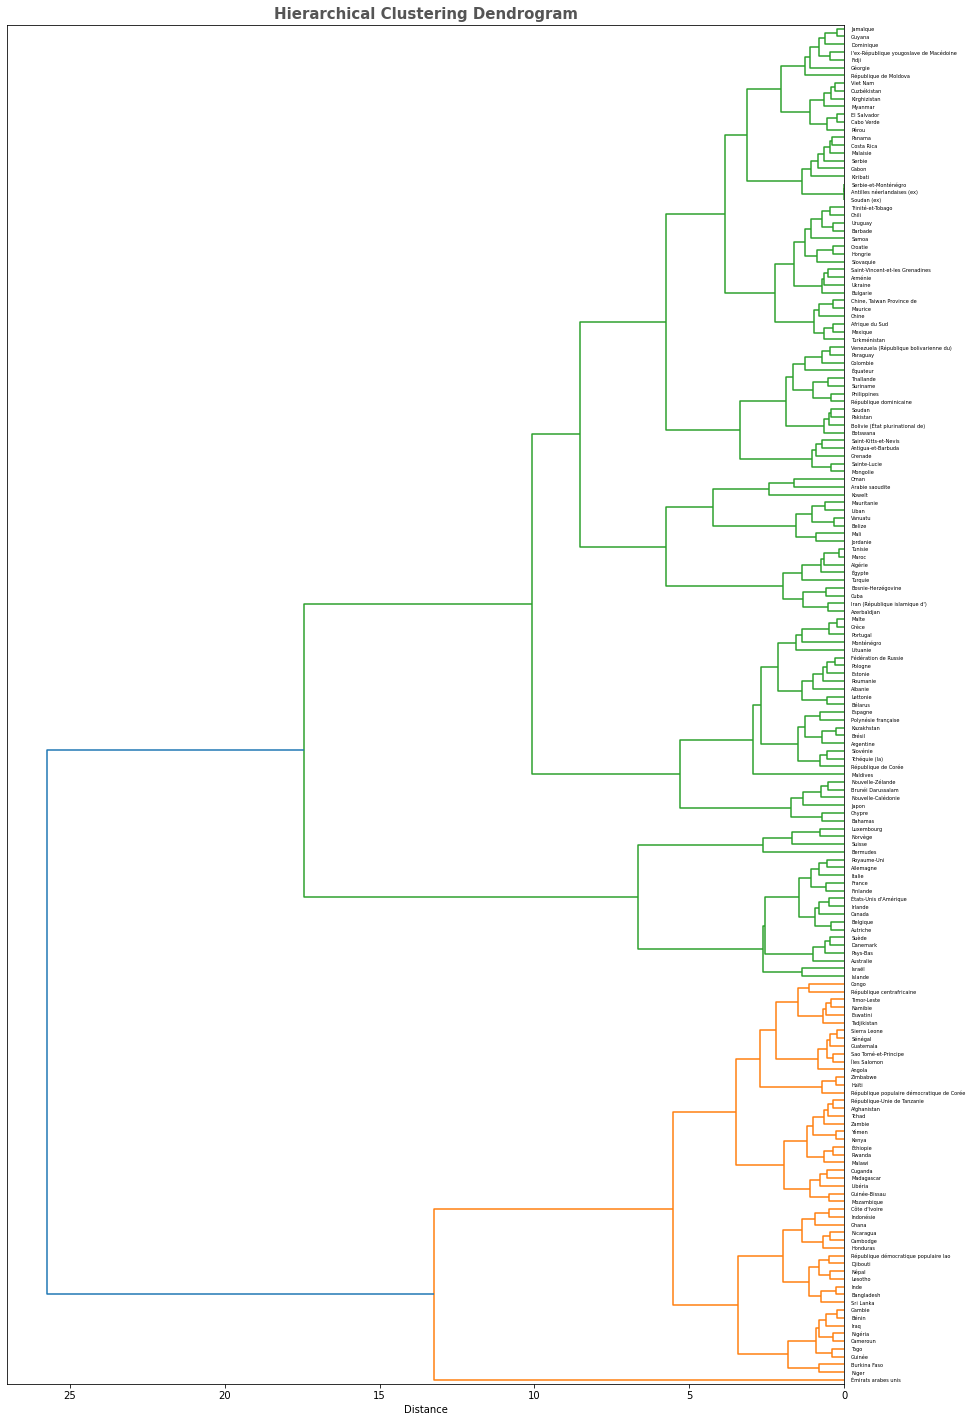

In [71]:
# Save data
df_data = main_df.copy()

# Scale data
df_data.X = preprocessing.StandardScaler().fit_transform(df_data.values)

# Compute the hierarchical clustering with the ward method.
df_data.Z = linkage(df_data.X, 'ward')

# Plot the dendrogram
fig = plt.figure(figsize=(15,25))
ax = plt.subplot()
dendrogram(
    df_data.Z,
    labels = df_data.index,
    orientation = "left",
)
ax.set_title("Hierarchical Clustering Dendrogram", fontsize=15, y=1, color='#555555', fontweight='bold')
ax.set_xlabel("Distance")

fig.savefig('Livrables/dendrogram.png')
            
plt.show()

# 3. Clustering

In [72]:
# Save the clusters
df_data['clusters'] = fcluster(df_data.Z, 5, criterion='maxclust')

# Compute and save the centroïds
centroids = np.ndarray(shape=(0, df_data.X.shape[1]))
centroids_names = np.array([]).astype(int)

for cluster in np.unique(df_data.clusters):
    new_row = df_data.X[np.where(df_data.clusters == cluster)].mean(axis=0)

    centroids = np.vstack((centroids, new_row))
    centroids_names = np.append(centroids_names, cluster)

df_data.centroids = centroids
df_data.centroids_names = centroids_names

# Print the clusters
for i in range(1,6):
    print(f"Groupe {i}:")
    print(", ".join(df_data.index[np.where(df_data.clusters == i)]))
    print(" ")

df_data

Groupe 1:
Afghanistan, Angola, Bangladesh, Îles Salomon, Cameroun, République centrafricaine, Sri Lanka, Tchad, Congo, Bénin, Djibouti, Gambie, Ghana, Guatemala, Guinée, Haïti, Honduras, Inde, Indonésie, Iraq, Côte d'Ivoire, Kenya, Cambodge, République populaire démocratique de Corée, République démocratique populaire lao, Lesotho, Libéria, Madagascar, Malawi, Mozambique, Namibie, Népal, Nicaragua, Niger, Nigéria, Guinée-Bissau, Timor-Leste, Zimbabwe, Rwanda, Sao Tomé-et-Principe, Sénégal, Sierra Leone, Tadjikistan, Eswatini, République-Unie de Tanzanie, Togo, Ouganda, Burkina Faso, Éthiopie, Yémen, Zambie
 
Groupe 2:
Émirats arabes unis
 
Groupe 3:
Australie, Autriche, Bermudes, Canada, Danemark, Finlande, France, Allemagne, Islande, Irlande, Israël, Italie, Pays-Bas, Norvège, Suède, Suisse, Royaume-Uni, États-Unis d'Amérique, Belgique, Luxembourg
 
Groupe 4:
Albanie, Argentine, Bahamas, Brésil, Brunéi Darussalam, Chypre, Bélarus, Estonie, Polynésie française, Grèce, Kazakhstan, Japon

,pop_evol (%),PIB 2013,kcal_total_capita_day,proteins_total_capita_day,proteins_animal_ratio,clusters
Country,,,,,,
Arménie,-1.943347,3838.180041,2924.0,90.06,0.480235,5
Afghanistan,32.168195,608.058642,2087.0,58.26,0.209749,1
Albanie,-2.037666,4399.863881,3188.0,111.37,0.533537,4
Algérie,18.801321,5499.587619,3293.0,91.92,0.271867,5
Angola,39.238700,5254.883253,2474.0,57.27,0.321285,1
...,...,...,...,...,...,...
Luxembourg,18.568233,113792.672170,3540.0,113.64,0.634636,3
Serbie,15.994234,6752.796587,2725.0,82.21,0.485707,5
Monténégro,15.994234,7127.905005,3490.0,111.90,0.563986,4


# 4. Analyses en Composantes Principales

In [73]:
# Assign the values
df_data.features = main_df.columns

# Compute PCA
df_data.pca = decomposition.PCA(4)
df_data.pca.fit(df_data.X)
df_data.X_projected = df_data.pca.transform(df_data.X)
df_data.pca.fit(df_data.centroids)
centroids_projected = df_data.pca.transform(df_data.centroids)

pcs = df_data.pca.components_

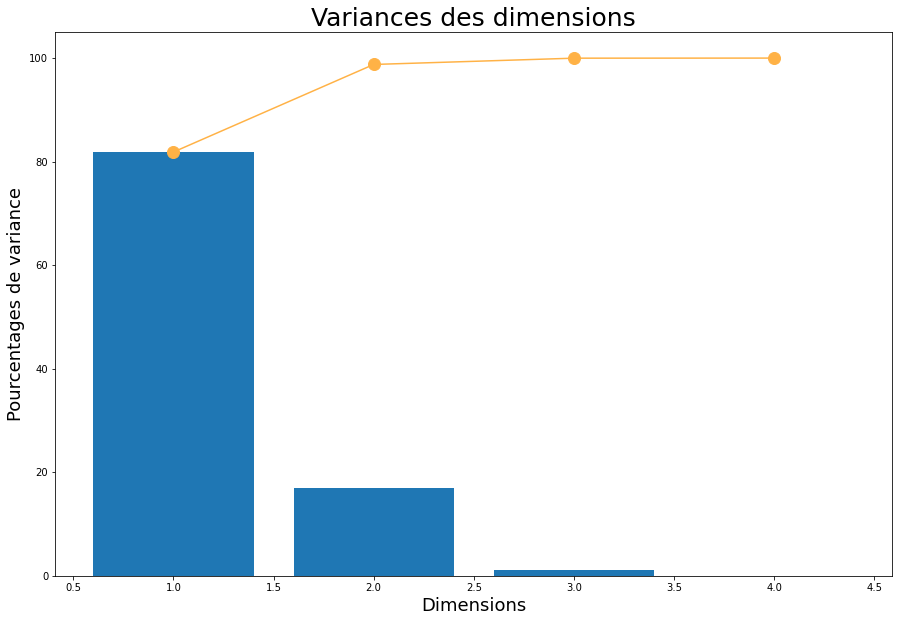

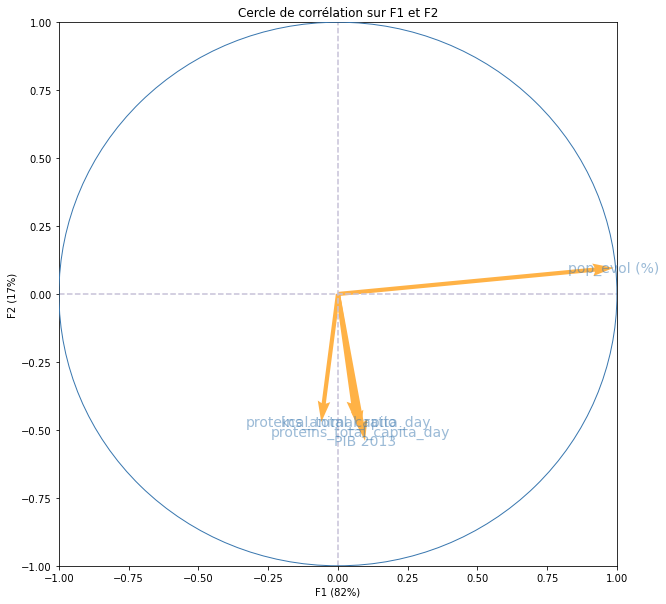

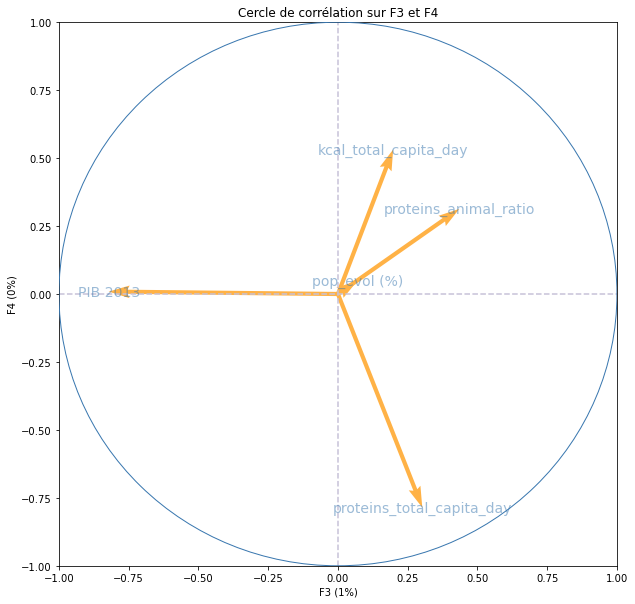

In [74]:
# Plot the scree plot of eigenvalues.
scree = df_data.pca.explained_variance_ratio_*100
ax = plt.subplots(figsize=(15,10))
plt.bar(np.arange(len(scree))+1, scree, zorder=2)
plt.plot(
        np.arange(len(scree))+1,
        scree.cumsum(),
        c="#FFB246",
        marker='o',
        markersize=12
        )
plt.xlabel("Dimensions",fontsize=18)
plt.ylabel("Pourcentages de variance",fontsize=18)
plt.title("Variances des dimensions",fontsize=25)

# Plot the correlation circle on F1 & F2
ax1 = plt.subplots(figsize=(10,10))
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='#3977af', zorder=3)
plt.gca().add_artist(circle)
plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
               pcs[0,:], pcs[1,:], 
               angles='xy', scale_units='xy', scale=1, color="#FFB246")
for i,(x, y) in enumerate(pcs[[0,1]].T):
    if x >= -1 and x <= 1 and y >= -1 and y <= 1 :
        plt.text(x, y, df_data.features[i], fontsize='14', ha='center', va='center', rotation=0, color="#3977af", alpha=0.5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.plot([-1, 1], [0, 0], color='#c6c1d8', ls='--')
plt.plot([0, 0], [-1, 1], color='#c6c1d8', ls='--')
plt.xlabel(f"F1 ({df_data.pca.explained_variance_ratio_[0]:.0%})")
plt.ylabel(f"F2 ({df_data.pca.explained_variance_ratio_[1]:.0%})")
plt.title("Cercle de corrélation sur F1 et F2")

# Plot the correlation circle on F3 & F4
ax2 = plt.subplots(figsize=(10,10))
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='#3977af', zorder=3)
plt.gca().add_artist(circle)
plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
               pcs[2,:], pcs[3,:], 
               angles='xy', scale_units='xy', scale=1, color="#FFB246")
for i,(x, y) in enumerate(pcs[[2,3]].T):
    if x >= -1 and x <= 1 and y >= -1 and y <= 1 :
        plt.text(x, y, df_data.features[i], fontsize='14', ha='center', va='center', rotation=0, color="#3977af", alpha=0.5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.plot([-1, 1], [0, 0], color='#c6c1d8', ls='--')
plt.plot([0, 0], [-1, 1], color='#c6c1d8', ls='--')
plt.xlabel(f"F3 ({df_data.pca.explained_variance_ratio_[2]:.0%})")
plt.ylabel(f"F4 ({df_data.pca.explained_variance_ratio_[3]:.0%})")
plt.title("Cercle de corrélation sur F3 et F4")

plt.show()

In [75]:
# Create 3 new columns to add PCA dimensions' values
df_data['F1'] = 1.0
df_data['F2'] = 2.0
df_data['F3'] = 3.0

# add PCA dimensions' values
for j in range(len(df_data)):
    df_data['F1'][j] = df_data.X_projected[j][0]
    df_data['F2'][j] = df_data.X_projected[j][1]
    df_data['F3'][j] = df_data.X_projected[j][2]

df_data = df_data.reset_index()
df_data

,Country,pop_evol (%),PIB 2013,kcal_total_capita_day,proteins_total_capita_day,proteins_animal_ratio,clusters,F1,F2,F3
0,Arménie,-1.943347,3838.180041,2924.0,90.06,0.480235,5,0.511589,-1.086613,-0.382163
1,Afghanistan,32.168195,608.058642,2087.0,58.26,0.209749,1,-2.648007,0.435521,0.378822
2,Albanie,-2.037666,4399.863881,3188.0,111.37,0.533537,4,1.562424,-0.928378,-0.979067
3,Algérie,18.801321,5499.587619,3293.0,91.92,0.271867,5,0.111197,0.273961,-1.481151
4,Angola,39.238700,5254.883253,2474.0,57.27,0.321285,1,-1.883234,0.894616,0.308438
...,...,...,...,...,...,...,...,...,...,...
170,Luxembourg,18.568233,113792.672170,3540.0,113.64,0.634636,3,4.426726,2.067716,1.936440
171,Serbie,15.994234,6752.796587,2725.0,82.21,0.485707,5,-0.084829,-0.199444,0.065703
172,Monténégro,15.994234,7127.905005,3490.0,111.90,0.563986,4,1.836800,0.115261,-1.282109
173,Soudan,15.994234,1724.553464,2335.0,70.69,0.413071,5,-1.171774,-0.398864,0.452133


In [85]:
# Rename the centroids
centroids_names = [
    'Très pauvres et très mal nourris',
    'Émirats arabes unis',
    'Très riches et très bien nourris',
    'Riches et bien nourris',
    'Pauvres et mal nourris'
]
df_data['cluster']=''
# Rename the complete clusters list
for i in df_data.index:
  if df_data.clusters[i] == 1:
    df_data.cluster[i] = 'Très Pauvres et très mal nourris'
  elif df_data.clusters[i] == 2:
    df_data.cluster[i] = 'Émirats arabes unis'
  elif df_data.clusters[i] == 3:
    df_data.cluster[i] = 'Très Riches et très bien nourris'
  elif df_data.clusters[i] == 4:
    df_data.cluster[i] = 'Riches et bien nourris'
  elif df_data.clusters[i] == 5:
    df_data.cluster[i] = 'Pauvres et mal nourris'
  else:
    df_data.cluster[i] = ''

display(df_data.tail(30))

,Country,pop_evol (%),PIB 2013,kcal_total_capita_day,proteins_total_capita_day,proteins_animal_ratio,clusters,F1,F2,F3,cluster
145,Suisse,10.824530,87897.255850,3393.0,92.89,0.643449,3,3.270936,1.050009,1.820679,Très Riches et très bien nourris
146,Turkménistan,12.736661,7304.283049,2836.0,90.50,0.419337,5,0.117545,-0.236331,-0.390381,Pauvres et mal nourris
147,"Chine, Taiwan Province de",3.975399,14520.729068,2998.0,89.73,0.484676,5,0.753783,-0.579905,-0.166429,Pauvres et mal nourris
148,République-Unie de Tanzanie,33.981665,964.249441,2204.0,57.76,0.176593,1,-2.644549,0.585538,0.151893,Très Pauvres et très mal nourris
149,Thaïlande,3.912356,6168.268616,2785.0,60.85,0.408381,5,-0.678036,-0.897322,0.221504,Pauvres et mal nourris
150,Togo,29.625404,720.256705,2448.0,59.76,0.151272,1,-2.335784,0.443625,-0.263073,Très Pauvres et très mal nourris
151,Trinité-et-Tobago,4.439252,20143.525527,3049.0,83.33,0.517341,5,0.855546,-0.507122,0.143715,Pauvres et mal nourris
152,Oman,52.030138,20865.786276,3140.0,88.21,0.517968,5,0.479618,2.039557,-0.214147,Pauvres et mal nourris
153,Tunisie,11.678684,4222.812667,3349.0,98.49,0.288050,5,0.467676,-0.078536,-1.650574,Pauvres et mal nourris
154,Turquie,13.641603,12614.990713,3708.0,108.12,0.335831,5,1.439243,0.280341,-1.934890,Pauvres et mal nourris


In [84]:
fig = px.scatter_3d(df_data, x="F1", y="F2", z="F3", hover_name="Country", color='cluster', opacity=0.8, title="Projection des pays sur F1, F2 et F3", width=800)
fig.show()

# Interprétations

La première composante permet de bien résumer nos trois indicateurs liés à la nutrition. On peut donc considérer que plus sa valeur est grande pour un pays donné, plus ce pays est consommateur de nourriture.

La deuxième composante n'est quasiment liée qu'à l'évolution de la population. Considérons qu'une population qui évolue positivement est une population en bonne santé, bien nourrie.

La troisième composante fait le lien entre richesse (par habitant) et ratio de protèine par habitant. Cette dimension nous permet de juger de la richesse financière et alimentaire d'un pays.

D'ailleurs, le classement hierarchique fait ressortir des groupes dans ce sens là.

Entre deux groupes "proches", la dimension qui permet de les différencier est l'évolution de la population.

# Export des centroïds

In [78]:
# Scaled centroïds dataframe
dfc1 = pd.DataFrame(centroids, columns=main_df.columns, index=centroids_names)
display(dfc1)

# Projected centroïds dataframe
df_centroids_projected = [
    'F1',
    'F2',
    'F3',
    'F4'
]
dfc2 = pd.DataFrame(centroids_projected, columns=df_centroids_projected, index=centroids_names)
display(dfc2)

# Merging both
dfc3 = dfc1.merge(dfc2, how='left', left_index=True, right_index=True)
display(dfc3)

# CSV export
dfc3.to_csv('Livrables/centroids.csv')

,pop_evol (%),PIB 2013,kcal_total_capita_day,proteins_total_capita_day,proteins_animal_ratio
Très pauvres et très mal nourris,0.556166,-0.634360,-1.057342,-1.104689,-1.220333
Émirats arabes unis,9.190085,1.378135,0.990441,1.209197,-0.162607
Très riches et très bien nourris,-0.407104,2.255027,1.365960,1.423315,1.225956
Riches et bien nourris,-0.581975,0.322571,0.743204,0.968286,0.954640
Pauvres et mal nourris,-0.180252,-0.300470,0.073004,0.006841,0.159279


,F1,F2,F3,F4
Très pauvres et très mal nourris,-1.405505,2.730512,-0.454844,-0.034477
Émirats arabes unis,7.575742,-0.156789,0.055524,0.000049
Très riches et très bien nourris,-1.864239,-2.493795,-0.588652,0.012853
Riches et bien nourris,-2.284770,-0.815667,0.608612,-0.071115
Pauvres et mal nourris,-2.021228,0.735740,0.379360,0.092690


,pop_evol (%),PIB 2013,kcal_total_capita_day,proteins_total_capita_day,proteins_animal_ratio,F1,F2,F3,F4
Très pauvres et très mal nourris,0.556166,-0.634360,-1.057342,-1.104689,-1.220333,-1.405505,2.730512,-0.454844,-0.034477
Émirats arabes unis,9.190085,1.378135,0.990441,1.209197,-0.162607,7.575742,-0.156789,0.055524,0.000049
Très riches et très bien nourris,-0.407104,2.255027,1.365960,1.423315,1.225956,-1.864239,-2.493795,-0.588652,0.012853
Riches et bien nourris,-0.581975,0.322571,0.743204,0.968286,0.954640,-2.284770,-0.815667,0.608612,-0.071115
Pauvres et mal nourris,-0.180252,-0.300470,0.073004,0.006841,0.159279,-2.021228,0.735740,0.379360,0.092690


# Résumé des 5 groupes via la moyennes des variables

In [79]:

df_cluster = df_data.drop(['pop_evol (%)','PIB 2013','kcal_total_capita_day','proteins_total_capita_day','proteins_animal_ratio','clusters','F1','F2','F3'],1,inplace=False)
display(df_cluster)

# We export countries and clusters in a CSV file
pd.DataFrame(df_cluster).to_csv('Livrables/pays_clusters.csv')

,Country,cluster
0,Arménie,Pauvres et mal nourris
1,Afghanistan,Très Pauvres et très mal nourris
2,Albanie,Riches et bien nourris
3,Algérie,Pauvres et mal nourris
4,Angola,Très Pauvres et très mal nourris
...,...,...
170,Luxembourg,Très Riches et très bien nourris
171,Serbie,Pauvres et mal nourris
172,Monténégro,Riches et bien nourris
173,Soudan,Pauvres et mal nourris


# Interprétation
Le groupe 3 ("Très riches et très bien nourris") performent sur toutes les variables liées à la nutrition et au PIB.
Son évolution de population est d'environ 6,6%. Pour donner un ordre d'idée, la France est à environ 6,2%.

On peut donc focus sur ce troisième groupe.

In [80]:
# We save the main_df with clusters in a file
with open('Data/part2.pkl', 'wb') as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(df_data)